## Scraping Top Repositories for Topics on GitHub

TODO (Intro):

- Introduction about web scraping
- Introduction about GitHub and the problem statement
- Mention the tools you're using (Python, requests, Beautiful Soup, Pandas)

Here are the steps we'll follow:

- We're going to scrape https://github.com/topics
- We'll get a list of topics. For each topic, we'll get topic title, topic page URL and topic description
- For each topic, we'll get the top 25 repositories in the topic from the topic page
- For each repository, we'll grab the repo name, username, stars and repo URL
- For each topic we'll create a CSV file in the following format:
Repo Name,Username,Stars,Repo URL
three.js,mrdoob,69700,https://github.com/mrdoob/three.js
libgdx,libgdx,18300,https://github.com/libgdx/libgdx

## Scrape the list of topics from Github

### Scrape the list of topics from Github

- use requests to downlaod the page
- user BS4 to parse and extract information
- convert to a Pandas dataframe
Let's write a function to download the page.



In [3]:
import requests

from bs4 import BeautifulSoup

def get_topics_page():
    # TODO - add comments
    topics_url = 'https://github.com/topics'
    response = requests.get(topics_url)
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(topic_url))
    doc = BeautifulSoup(response.text, 'html.parser')
    return doc

In [4]:
doc = get_topics_page()

Let's create some helper functions to parse information from the page.
To get topic titles, we can pick p tags with the class ...

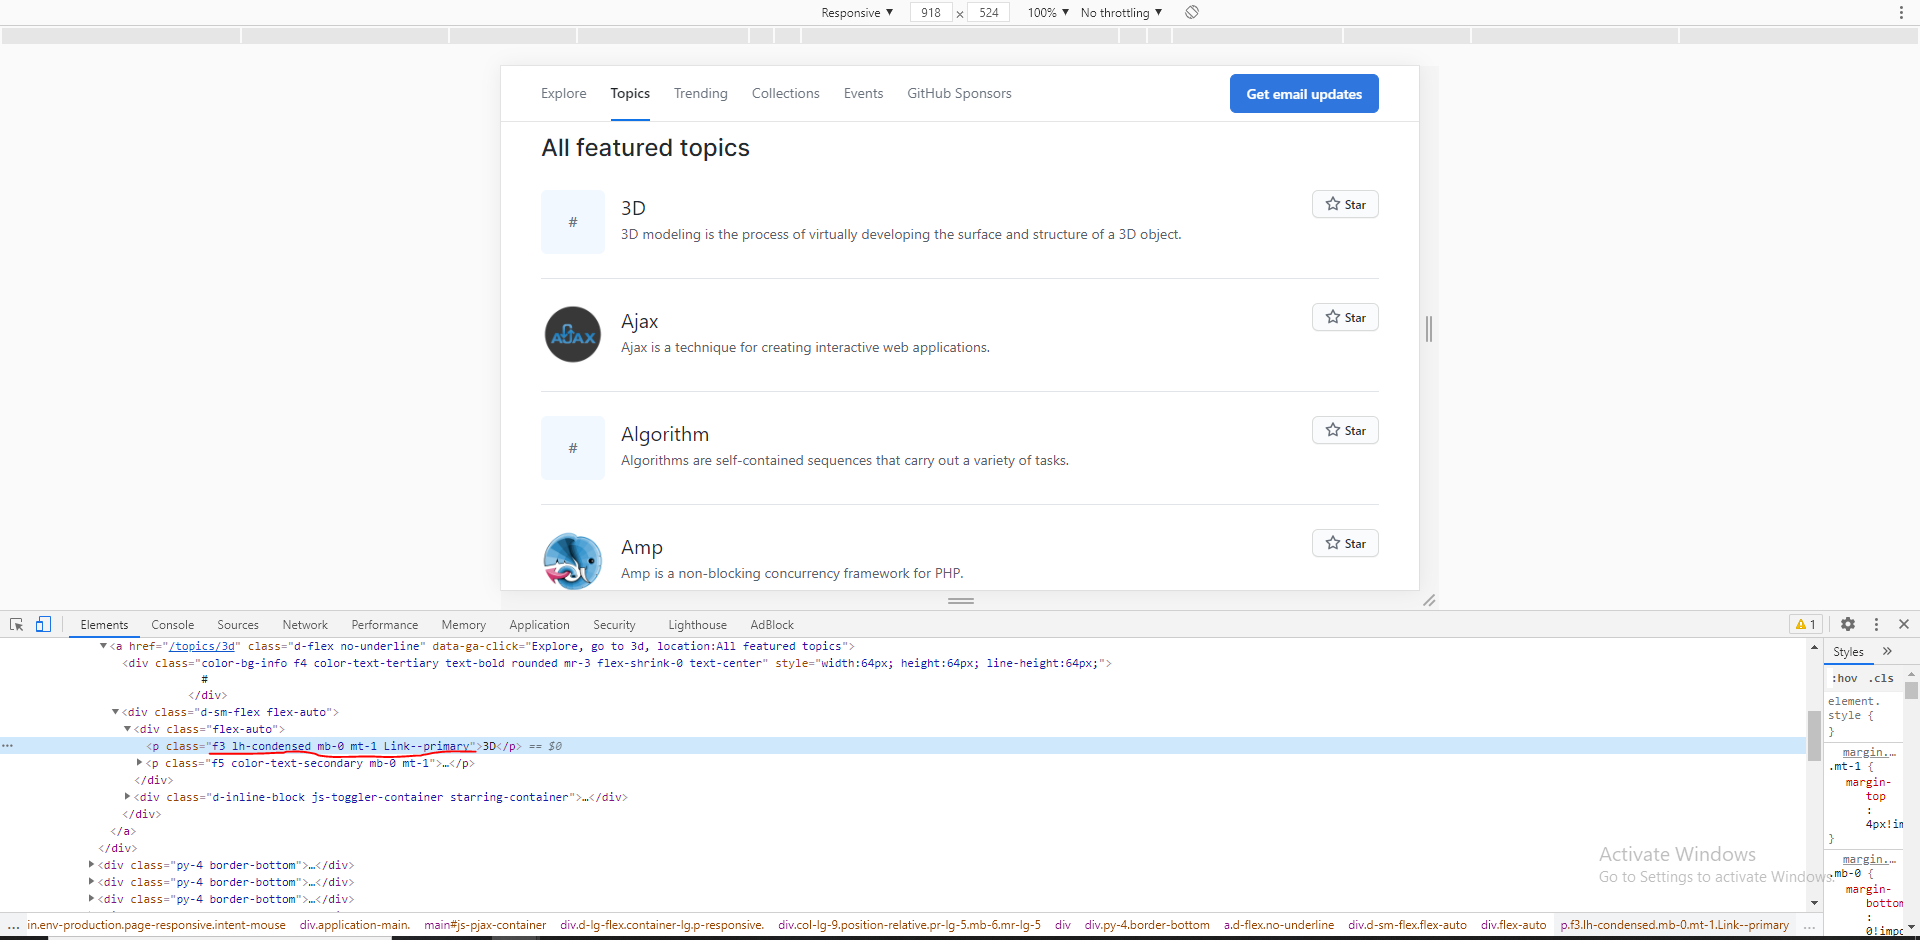

In [23]:
from IPython.display import Image
Image(filename='output1.png')

In [5]:
def get_topic_titles(doc):
    selection_class = 'f3 lh-condensed mb-0 mt-1 Link--primary'
    topic_title_tags = doc.find_all('p', {'class': selection_class})
    topic_titles = []
    for tag in topic_title_tags:
        topic_titles.append(tag.text)
    return topic_titles

get_topic_titles can be used to get the list of titles

In [6]:
titles = get_topic_titles(doc)

In [7]:
len(titles)

30

In [8]:
titles[:5]

['3D', 'Ajax', 'Algorithm', 'Amp', 'Android']

Similarly we have defined functions for descriptions and URLs.

In [9]:
def get_topic_descs(doc):
    desc_selector = 'f5 color-text-secondary mb-0 mt-1'
    topic_desc_tags = doc.find_all('p', {'class': desc_selector})
    topic_descs = []
    for tag in topic_desc_tags:
        topic_descs.append(tag.text.strip())
    return topic_descs

In [10]:
def get_topic_urls(doc):
    topic_link_tags = doc.find_all('a', {'class': 'd-flex no-underline'})
    topic_urls = []
    base_url = 'https://github.com'
    for tag in topic_link_tags:
        topic_urls.append(base_url + tag['href'])
    return topic_urls

Let's put this all together into a single function

In [11]:
def scrape_topics():
    topics_url = 'https://github.com/topics'
    response = requests.get(topics_url)
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(topic_url))
    doc = BeautifulSoup(response.text, 'html.parser')
    topics_dict = {
        'title': get_topic_titles(doc),
        'description': get_topic_descs(doc),
        'url': get_topic_urls(doc)
    }
    return pd.DataFrame(topics_dict)

## Get the top 25 repositories from a topic page

In [12]:
def get_topic_page(topic_url):
    # Download the page
    response = requests.get(topic_url)
    # Check successful response
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(topic_url))
    # Parse using Beautiful soup
    topic_doc = BeautifulSoup(response.text, 'html.parser')
    return topic_doc

In [13]:
doc = get_topic_page('https://github.com/topics/3d')

In [14]:
def get_topic_repos(topic_doc):
    # Get the h1 tags containing repo title, repo URL and username
    h1_selection_class = 'f3 color-text-secondary text-normal lh-condensed'
    repo_tags = topic_doc.find_all('h1', {'class': h1_selection_class} )
    # Get star tags
    star_tags = topic_doc.find_all('a', { 'class': 'social-count float-none'})
    
    topic_repos_dict = { 'username': [], 'repo_name': [], 'stars': [],'repo_url': []}

    # Get repo info
    for i in range(len(repo_tags)):
        repo_info = get_repo_info(repo_tags[i], star_tags[i])
        topic_repos_dict['username'].append(repo_info[0])
        topic_repos_dict['repo_name'].append(repo_info[1])
        topic_repos_dict['stars'].append(repo_info[2])
        topic_repos_dict['repo_url'].append(repo_info[3])
        
    return pd.DataFrame(topic_repos_dict)

In [15]:
def scrape_topic(topic_url, path):
    if os.path.exists(path):
        print("The file {} already exists. Skipping...".format(path))
        return
    topic_df = get_topic_repos(get_topic_page(topic_url))
    topic_df.to_csv(path, index=None)

## Putting it all together
- We have a funciton to get the list of topics
- We have a function to create a CSV file for scraped repos from a topics page
- Let's create a function to put them together

In [17]:
def scrape_topics_repos():
    print('Scraping list of topics')
    topics_df = scrape_topics()
    
    os.makedirs('data', exist_ok=True)
    for index, row in topics_df.iterrows():
        print('Scraping top repositories for "{}"'.format(row['title']))
        scrape_topic(row['url'], 'data/{}.csv'.format(row['title']))

Let's run it to scrape the top repos for the all the topics on the first page of https://github.com/topics

In [20]:
import os
import pandas as pd
scrape_topics_repos()

Scraping list of topics
Scraping top repositories for "3D"
The file data/3D.csv already exists. Skipping...
Scraping top repositories for "Ajax"
The file data/Ajax.csv already exists. Skipping...
Scraping top repositories for "Algorithm"
The file data/Algorithm.csv already exists. Skipping...
Scraping top repositories for "Amp"
The file data/Amp.csv already exists. Skipping...
Scraping top repositories for "Android"
The file data/Android.csv already exists. Skipping...
Scraping top repositories for "Angular"
The file data/Angular.csv already exists. Skipping...
Scraping top repositories for "Ansible"
The file data/Ansible.csv already exists. Skipping...
Scraping top repositories for "API"
The file data/API.csv already exists. Skipping...
Scraping top repositories for "Arduino"
The file data/Arduino.csv already exists. Skipping...
Scraping top repositories for "ASP.NET"
The file data/ASP.NET.csv already exists. Skipping...
Scraping top repositories for "Atom"
The file data/Atom.csv alre